# Employee Turnover Project

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.<br>
Data from prior evaluations show the employees’ satisfaction at the workplace. The data could be used to identify patterns in work style and their interest in continuing to work in the company. <br>
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.<br>
As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to<br>
    1. Perform data quality checks by checking for missing values if any.<br>
    2. Understand what factors contributed most to employee turnover by EDA.<br>
    3. Perform clustering of Employees who left based on their satisfaction and evaluation.<br>
    4. Handle the left Class Imbalance using the SMOTE technique.<br>
    5. Perform k-fold cross-validation model training and evaluate performance. <br>
    6. Identify the best model and justify the evaluation metrics used. <br>
    7. Suggest various retention strategies for targeted employees.<br>
    
https://www.kaggle.com/liujiaqi/hr-comma-sepcsv<br>

## Import data and do proper data wrangling

In [1]:
# Importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# check for null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Factors Contributing to Employee Turnover
Here we will check the various factors that contributed to employee turnover.

### Heatmap of the Correlation Matrix between all numerical features/columns in the data

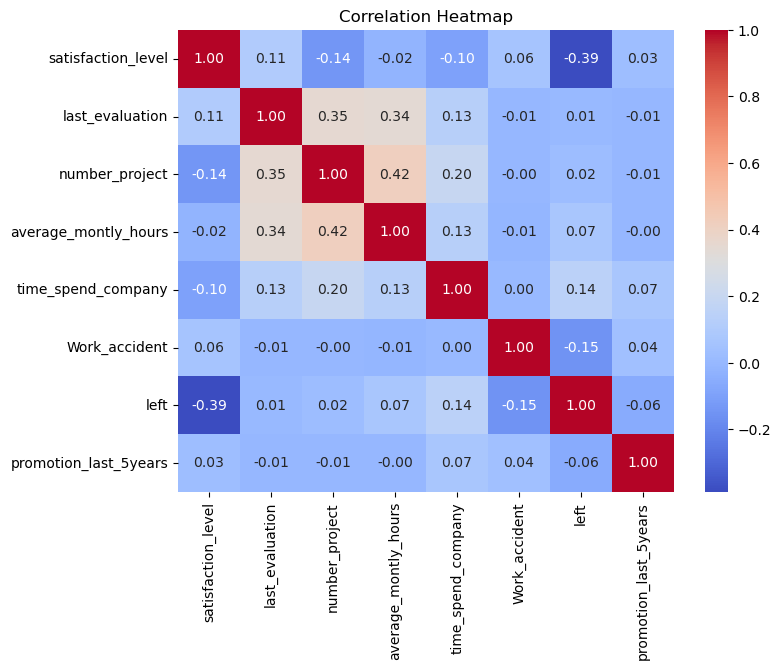

In [5]:
# heatmap of correlation between the numerical values
corr_matrix = df.drop(['department', 'salary'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Heatmap results
From the above heatmap, we can see the following variables have correlation with regards to the employee turnover (variable called left) from negative to positive correlation:
- satisfaction_level (highest negative)
- work_accident
- time_spend_company (highest positive)

### Distributions Plots

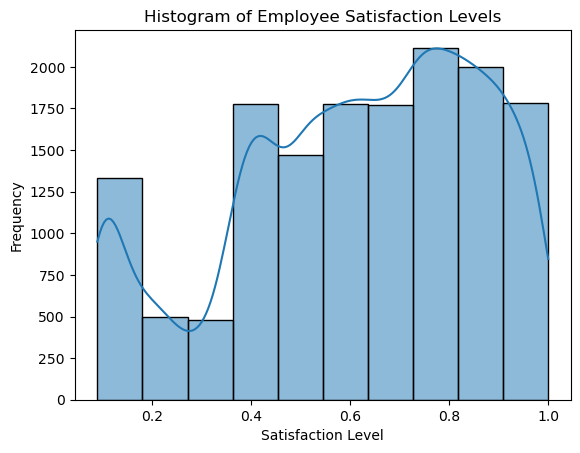

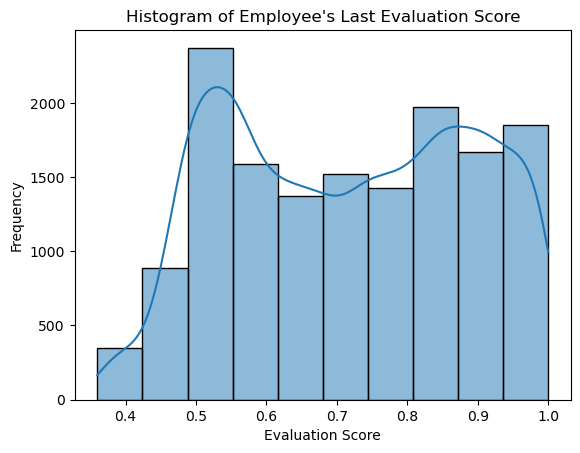

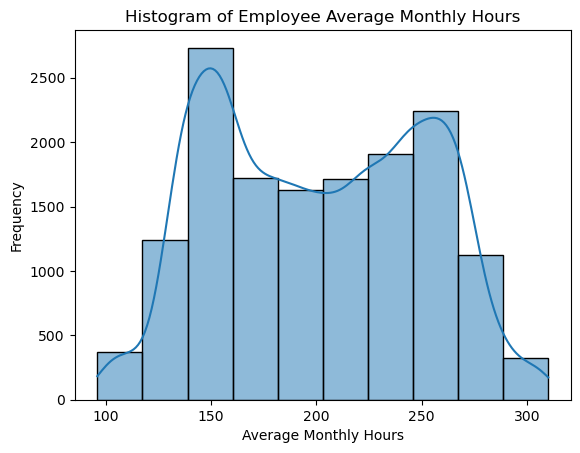

In [6]:
sns.histplot(df['satisfaction_level'], bins=10, kde=True)
plt.title('Histogram of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['last_evaluation'], bins=10, kde=True)
plt.title("Histogram of Employee's Last Evaluation Score")
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['average_montly_hours'], bins=10, kde=True)
plt.title('Histogram of Employee Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

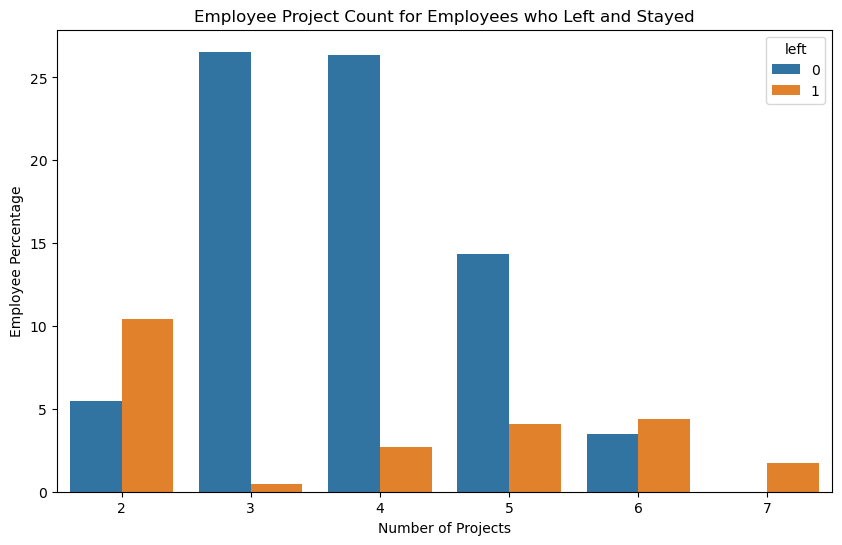

In [7]:
# Bar plot of number_project and employee turnover (left)
plt.figure(figsize=(10, 6))
sns.barplot(x='number_project', y='left', data=df, hue='left', estimator=lambda x: len(x) / len(df) * 100)
plt.xlabel('Number of Projects')
plt.ylabel('Employee Percentage')
plt.title('Employee Project Count for Employees who Left and Stayed')
plt.show()

From the plot we can see that Employee retention seems to be higher in when number of projects are in the range of (3,5) and that there is high turnover rate when an employee is involved with 2, 6 or 7 projects.

## Perform clustering on employees that left

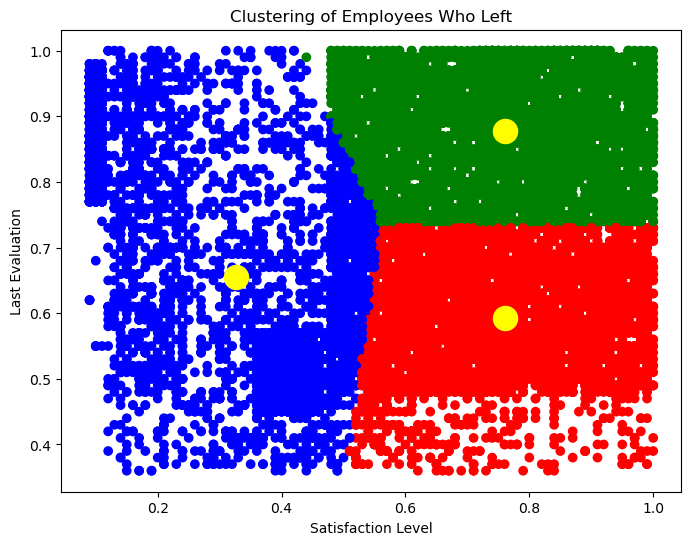

In [8]:
from sklearn.cluster import KMeans
df_left = df[df['left'] == 1]
X = df[['satisfaction_level', 'last_evaluation']]

# Perform K-Means clustering with 3 clusters
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['cluster'] = model.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'blue', 2: 'green'}
plt.scatter(df['satisfaction_level'], df['last_evaluation'], c=df['cluster'].map(colors))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left')
plt.show()

### Regarding the results of K-means clustering:
Based on the position of the centroids in the clustering, we can interpret that the 2 of the 3 centriods (red & green) have a similar satisfaction level positioning while differing in evaluation score. The green cluster shows us that despite the high satisfaction level and evaluation scores, there were several employees that chose to leave. The red cluster can be labelled as employees with high satisfaction level but with meadium level evaluation score. Finally we have the blue cluster which appears to be centered around employees with low satisfaction levels and varying evaluation scores.

## Check for dataset imbalance for left class & use SMOTE to balance dataset
Check for class imbalance for the left class (0 or 1 values) and use SMOTE to oversample the minority class to balance the dataset.

### Check for imbalance in dataset

In [9]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

We can see that the dataset is imbalanced and the dataset bias leans towards the data that results with employee retention, so we need to oversample the data classified as employees that left (aka data where left = 0).

### Pre-process categorical data

In [10]:
dummies = pd.get_dummies(df[['department', 'salary']], dtype=int)
df = df.drop(['department', 'salary'], axis=1)
df = pd.concat([df, dummies], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cluster,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,2,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
y_df = df.left
x_df = df.drop(['left'], axis=1)

### Split dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=123)

### Use SMOTE to oversample minority class

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
upsampled_X_train, upsampled_y_train = oversample.fit_resample(X_train, y_train)

## Training models using upsampled data 

In [14]:
# import tools to be used for model training
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Setup 5-fold cross-validation for all models
kf = KFold(n_splits=5, random_state=42, shuffle=True)  # 5-fold cross-validation

### Logistic Regression Model
Training a logistic regression model by applying 5-fold cross validation

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9137
           1       0.78      0.91      0.84      9137

    accuracy                           0.83     18274
   macro avg       0.84      0.83      0.83     18274
weighted avg       0.84      0.83      0.83     18274

Confusion Matrix:


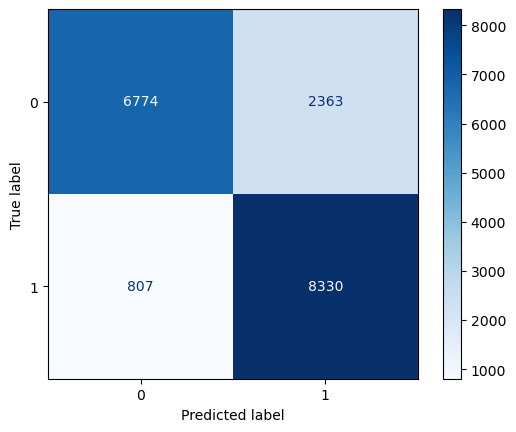

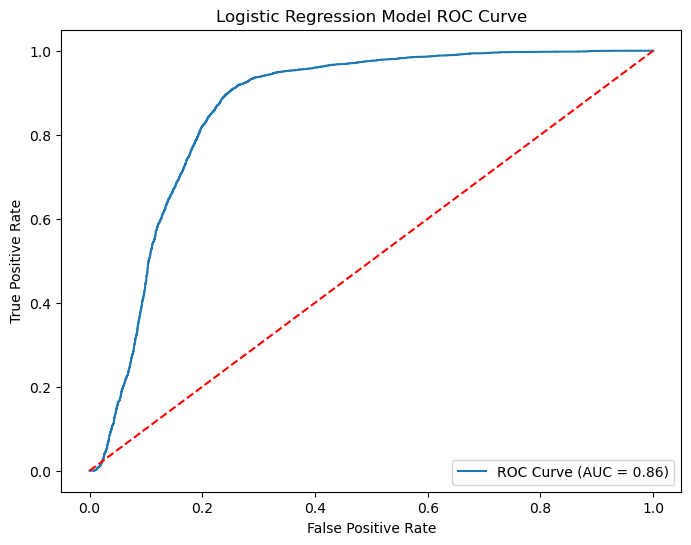

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, C=0.01, penalty='l2', solver='saga')

lr.fit(upsampled_X_train, upsampled_y_train)

y_pred = cross_val_predict(lr, upsampled_X_train, upsampled_y_train, cv=kf)
y_pred_proba = cross_val_predict(lr, upsampled_X_train, upsampled_y_train, cv=kf, method='predict_proba')[:, 1]

# Classification report
report = classification_report(upsampled_y_train, y_pred)
print(report)

# Confusion matrix
print("Confusion Matrix:")
confusion_mat = confusion_matrix(upsampled_y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

# ROC/AUC Curve
fpr, tpr, thresholds = roc_curve(upsampled_y_train, y_pred_proba)
roc_auc = roc_auc_score(upsampled_y_train, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Model ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Random forest classifier Model
Training a random forest classifier model by applying 5-fold cross validation

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9137
           1       0.99      0.98      0.99      9137

    accuracy                           0.99     18274
   macro avg       0.99      0.99      0.99     18274
weighted avg       0.99      0.99      0.99     18274

Confusion Matrix:


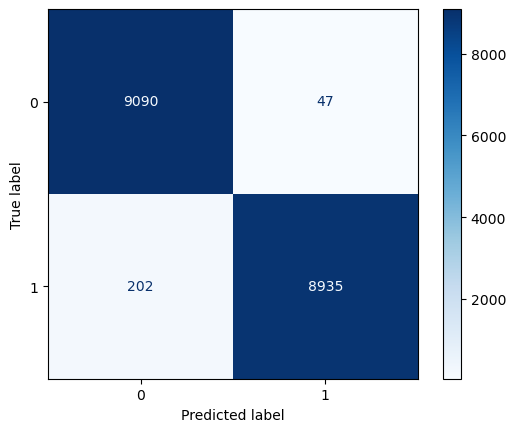

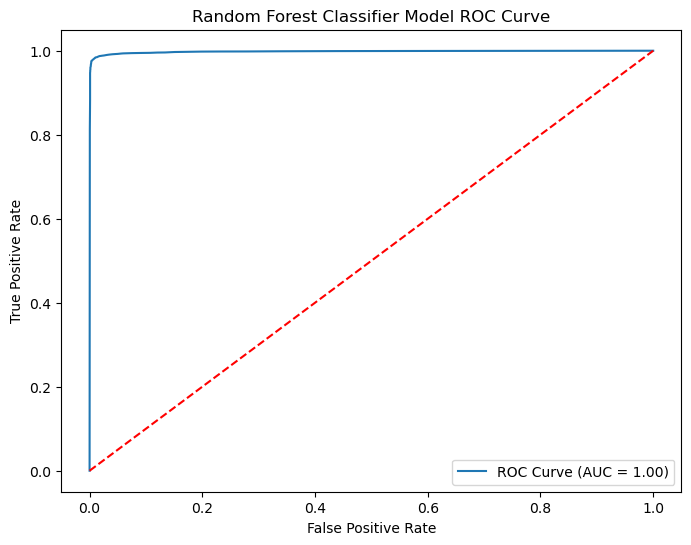

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80)

rf_classifier.fit(upsampled_X_train, upsampled_y_train)
y_pred = cross_val_predict(rf_classifier, upsampled_X_train, upsampled_y_train, cv=kf)
y_pred_proba = cross_val_predict(rf_classifier, upsampled_X_train, upsampled_y_train, cv=kf, method='predict_proba')[:, 1]

# Classification report
report = classification_report(upsampled_y_train, y_pred)
print(report)

# Confusion matrix
print("Confusion Matrix:")
confusion_mat = confusion_matrix(upsampled_y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

# ROC/AUC Curve
fpr, tpr, thresholds = roc_curve(upsampled_y_train, y_pred_proba)
roc_auc = roc_auc_score(upsampled_y_train, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier Model ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting classifier Model
Training a Gradient Boosting classifier model by applying 5-fold cross validation

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9137
           1       0.98      0.95      0.96      9137

    accuracy                           0.96     18274
   macro avg       0.96      0.96      0.96     18274
weighted avg       0.96      0.96      0.96     18274

Confusion Matrix:


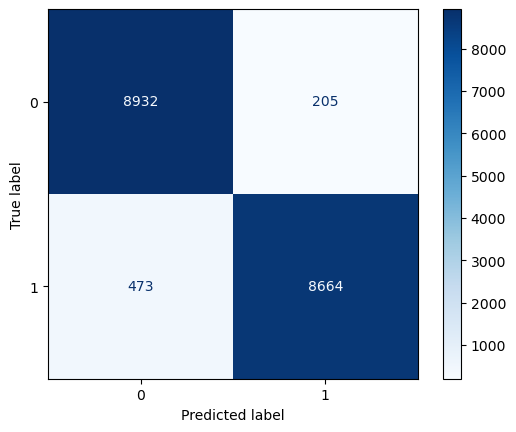

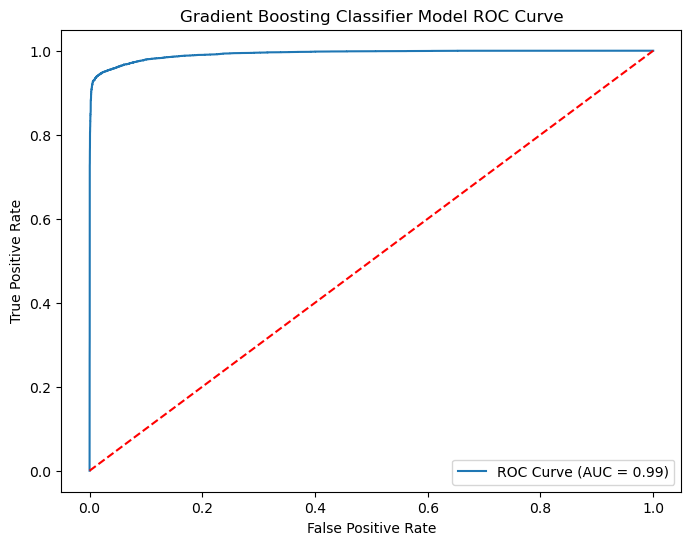

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(upsampled_X_train,upsampled_y_train)

y_pred = cross_val_predict(gradient_booster, upsampled_X_train, upsampled_y_train, cv=kf)
y_pred_proba = cross_val_predict(gradient_booster, upsampled_X_train, upsampled_y_train, cv=kf, method='predict_proba')[:, 1]

# Classification report
report = classification_report(upsampled_y_train, y_pred)
print(report)

# Confusion matrix
print("Confusion Matrix:")
confusion_mat = confusion_matrix(upsampled_y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=gradient_booster.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

# ROC/AUC Curve
fpr, tpr, thresholds = roc_curve(upsampled_y_train, y_pred_proba)
roc_auc = roc_auc_score(upsampled_y_train, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Classifier Model ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Identifying the best model

Firstly, by looking at the ROC curve, the associated AUC score, confusion matrix and report we can see that the Logistic Regression has the worst AUC score, accuracy and recall values out of the 3 models so we can drop it from consideration.<br><br> Next, we can look at the values from the confusion matrix to identify the best model more accurately. Since we're looking to predict whether an employee will leave or not, we want to have a high number of instances when predicting the true positive outcome (left = 1 for prediction & actual label) and have a low count of false negatives (left = 0 for prediction & left = 1 for actual) since we don't want to miss employees that have a high probabilty to leave. <br><br> Since the accuracy of both the models is high enough, we can ignore false positive (left = 1 for prediction & left = 0 for actual) counts since mispredicting that employees will leave even if they don't actually leave is not as detrimental as false negative events. <br> <br> We are looking a model with lower false negative events, so we should be looking at the recall metric from the confusion matrix and choose the model that has the highest recall value. Therefore, after looking at the recall value for the remaining 2 models (based on the confusion matrix numbers and the classification report), we can choose the Random Forest Classifier model as the best model for predicting the employee turnover for the test data.

## Predict turnover using test data & suggest retention strategies

Predict probability of employee turnover using the best model and classify data based on multiple thresholds of probability.

In [18]:
X_test = X_test.reset_index(drop=True)
yprob = rf_classifier.predict_proba(X_test)
classes = rf_classifier.classes_
resultdf = pd.DataFrame(data=yprob, columns=classes)
resultdf.columns = ['turnover_false_prob', 'turnover_true_prob']

In [19]:
resultdf

,turnover_false_prob,turnover_true_prob
0,0.9750,0.0250
1,1.0000,0.0000
2,1.0000,0.0000
3,0.8750,0.1250
4,1.0000,0.0000
...,...,...
2995,0.0250,0.9750
2996,1.0000,0.0000
2997,0.0000,1.0000
2998,0.9625,0.0375


Combine probabilites with test data to get a view of all the conditions that led to the probabilty of an employee turnover. Remove the column for turnover_false_prob since we are only looking for when the turnover = true.

In [20]:
test_result_df = pd.concat([X_test, resultdf], axis=1).drop(['turnover_false_prob'], axis=1)
test_result_df['turnover_prob_percentage'] = test_result_df['turnover_true_prob'] * 100
test_result_df.drop(['turnover_true_prob'], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cluster,department_IT,department_RandD,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,turnover_prob_percentage
0,0.54,0.67,3,154,2,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,2.50
1,0.72,0.52,3,143,4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.00
2,0.95,0.61,3,267,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.00
3,0.78,0.79,3,203,2,0,0,2,0,0,...,0,0,0,1,0,0,0,1,0,12.50
4,0.60,0.40,3,146,4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.42,0.55,2,148,3,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,97.50
2996,0.61,0.67,4,151,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.00
2997,0.87,0.91,4,228,5,0,0,2,0,0,...,0,0,0,1,0,0,0,1,0,100.00
2998,0.49,0.71,3,154,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,3.75


### Categorize data based on predicted probabilities
Categorize the employees into four zones based on probability score:<br>
- Safe Zone (Green) (Score < 20%)<br>
- Low-Risk Zone (Yellow) (20% < Score < 60%)<br>
- Medium-Risk Zone (Orange) (60% < Score < 90%)<br>
- High-Risk Zone (Red) (Score > 90%)

Based on the previously generated correlation heatmap, we know that the following variables have correlation with regards to the employee turnover (variable called left):
- satisfaction_level (highest negative)
- work_accident
- time_spend_company (highest positive)

We also have a graph which shows that when an employee was involved in 2, 6 or 7 projects, they had a higher chance of turnover.

In [21]:
# For large aggregate date display just the head and tail
pd.set_option('display.max_rows', 11)

#### Safe Zone (Green) (Score < 20%)

In [22]:
safe_zone_data = test_result_df[test_result_df['turnover_prob_percentage']<20]

In [23]:
# Group using number of projects
safe_zone_data.groupby(['number_project']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
number_project,
6,7.068966
2,6.153846
5,3.131039
4,2.039062
3,2.014925


In [24]:
# Group using last evaluation score
safe_zone_data.groupby(['last_evaluation']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
last_evaluation,
0.39,7.187500
1.00,6.250000
0.47,5.625000
0.45,5.208333
0.36,4.583333
...,...
0.50,1.636905
0.91,1.468750
0.57,1.398810


In [25]:
# Group using satisfaction level
safe_zone_data.groupby(['satisfaction_level']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
satisfaction_level,
0.46,12.500000
0.34,10.250000
0.15,10.125000
0.37,9.500000
0.44,8.750000
...,...
1.00,1.136364
0.98,1.100000
0.94,0.919118


In [26]:
# Group using time_spend_company
safe_zone_data.groupby(['time_spend_company']).mean()[['turnover_prob_percentage', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage,promotion_last_5years,salary_low,salary_medium,salary_high
time_spend_company,,,,,
5,7.322917,0.025000,0.500000,0.450000,0.050000
4,4.963826,0.012862,0.463023,0.424437,0.112540
6,4.431818,0.022727,0.329545,0.522727,0.147727
8,2.268519,0.074074,0.333333,0.629630,0.037037
10,2.025862,0.034483,0.275862,0.482759,0.241379
3,1.915602,0.031949,0.446219,0.449414,0.104366
2,1.770668,0.014308,0.438792,0.451510,0.109698
7,1.644737,0.315789,0.236842,0.526316,0.236842


In [27]:
# Group using average_montly_hours
safe_zone_data.groupby(['average_montly_hours']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
average_montly_hours,
99,16.250000
287,15.000000
280,12.750000
277,11.250000
279,10.937500
...,...
217,0.859375
170,0.781250
174,0.735294


####  Safe Zone Retention Plan
Employees in this zone have very low chance to turnover. However, the following factors were observed which showed an increase in turnover score:
- Low satisfaction level. Checking with employees with regards to their concerns or addressing any feedback.
- Either very high/low amount of average_montly_hours which could represent the employee being overworked or have no work and are dissatisfied with the company.
- Employees were involved in 2 or 6 projects which matches the observations from the 'Employee Project Count for Employees who Left and Stayed' bar chart. This could mean either the employee had way too many responsibilites or not enough work was given to them.
- Employees that had been in the company in the range of 4 to 6 years. These employees also had the lowest promotion rates so decreasing the turnover may involve giving bonuses/promotions based on their contributions.

#### Low-Risk Zone (Yellow) (20% < Score < 60%)

In [28]:
low_risk_zone_data = test_result_df[(test_result_df['turnover_prob_percentage']>20) & (test_result_df['turnover_prob_percentage']<60)]

In [29]:
# Group using number of projects
low_risk_zone_data.groupby(['number_project']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
number_project,
7,38.750000
5,36.306818
2,34.241071
6,33.920455
4,31.500000
3,27.302632


In [30]:
# Group using last evaluation score
low_risk_zone_data.groupby(['last_evaluation']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
last_evaluation,
0.88,53.750000
0.84,50.000000
0.46,47.500000
0.48,46.250000
0.85,42.083333
...,...
0.74,24.375000
0.98,23.333333
0.39,23.125000


In [31]:
# Group using satisfaction level
low_risk_zone_data.groupby(['satisfaction_level']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
satisfaction_level,
0.90,52.500
0.67,50.000
0.40,48.750
0.87,48.750
0.71,48.125
...,...
0.60,22.500
0.27,22.500
0.72,22.500


In [32]:
# Group using time_spend_company
low_risk_zone_data.groupby(['time_spend_company']).mean()[['turnover_prob_percentage', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage,promotion_last_5years,salary_low,salary_medium,salary_high
time_spend_company,,,,,
6,35.625000,0.000000,0.500000,0.500000,0.000000
3,35.120968,0.000000,0.774194,0.225806,0.000000
2,33.166667,0.000000,0.600000,0.400000,0.000000
5,32.370690,0.034483,0.379310,0.551724,0.068966
4,30.387931,0.000000,0.862069,0.103448,0.034483


In [33]:
# Group using average_montly_hours
low_risk_zone_data.groupby(['average_montly_hours']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
average_montly_hours,
300,57.50
172,56.25
136,55.00
244,52.50
281,50.00
...,...
203,22.50
236,21.25
116,21.25


####  Low-Risk Zone Retention Plan
This zone has a moderate risk of turnover. The following are the factors were observed which showed an increase in turnover score and suggestions on how to improve:
- Satisfaction level: Similar to the suggestion in the safe zone plan, this would involve checking in with employees for  their concerns or addressing any feedback regarding the company.
- Too many projects to handle as the employees that have 7 projects have the highest turnover rate in this zone.

#### Medium-Risk Zone (Orange) (60% < Score < 90%)

In [34]:
medium_risk_zone_data = test_result_df[(test_result_df['turnover_prob_percentage']>60) & (test_result_df['turnover_prob_percentage']<90)]

In [35]:
# Group using number of projects
medium_risk_zone_data.groupby(['number_project']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
number_project,
2,80.250000
5,76.458333
3,74.500000
6,72.187500
4,71.666667
7,63.750000


In [36]:
# Group using last evaluation score
medium_risk_zone_data.groupby(['last_evaluation']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
last_evaluation,
0.70,87.500
0.88,85.000
0.57,84.375
1.00,82.500
0.86,82.500
...,...
0.84,66.250
0.63,63.750
0.97,62.500


In [37]:
# Group using satisfaction level
medium_risk_zone_data.groupby(['satisfaction_level']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
satisfaction_level,
0.48,88.75
0.78,88.75
0.81,87.50
0.89,85.00
0.43,85.00
...,...
0.15,63.75
0.85,62.50
0.88,62.50


In [38]:
# Group using time_spend_company
medium_risk_zone_data.groupby(['time_spend_company']).mean()[['turnover_prob_percentage', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage,promotion_last_5years,salary_low,salary_medium,salary_high
time_spend_company,,,,,
3,77.625,0.0,0.80,0.20,0.0
5,75.875,0.0,0.60,0.40,0.0
4,71.875,0.0,0.75,0.25,0.0
6,69.000,0.0,0.60,0.40,0.0
2,62.500,0.0,0.00,1.00,0.0


In [39]:
# Group using average_montly_hours
medium_risk_zone_data.groupby(['average_montly_hours']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
average_montly_hours,
236,88.75
219,88.75
161,87.50
131,85.00
238,85.00
...,...
255,62.50
232,62.50
153,61.25


####  Medium-Risk Zone Retention Plan
This zone has a high risk of turnover. The following are the factors were observed which showed an increase in turnover score and suggestions on how to improve:
- As the number of years that an employee has spent in the company increases, there seems to be an increase in the turnover rate. Moreover there is almost no promotion provided to employees during those years. So offering promotions with increased salaries might reduce turnover.

#### High-Risk Zone (Red) (Score > 90%)

In [40]:
high_risk_zone_data = test_result_df[test_result_df['turnover_prob_percentage']>90]

In [41]:
# Group using number of projects
high_risk_zone_data.groupby(['number_project']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
number_project,
7,99.782609
2,99.457237
6,99.364224
5,98.660714
4,98.301282
3,96.250000


In [42]:
# Group using last evaluation score
high_risk_zone_data.groupby(['last_evaluation']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
last_evaluation,
0.80,100.000000
0.46,100.000000
0.54,99.951923
0.90,99.761905
0.51,99.708333
...,...
0.86,97.875000
0.57,97.678571
0.74,97.500000


In [43]:
# Group using satisfaction level
high_risk_zone_data.groupby(['satisfaction_level']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
satisfaction_level,
0.60,100.000000
0.82,100.000000
0.61,100.000000
0.53,100.000000
0.40,99.934211
...,...
0.48,96.250000
0.13,96.250000
0.81,95.625000


In [44]:
# Group using time_spend_company
high_risk_zone_data.groupby(['time_spend_company']).mean()[['turnover_prob_percentage', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage,promotion_last_5years,salary_low,salary_medium,salary_high
time_spend_company,,,,,
3,99.478477,0.003311,0.589404,0.360927,0.049669
4,99.260671,0.000000,0.603659,0.378049,0.018293
6,98.854167,0.000000,0.750000,0.250000,0.000000
5,98.535032,0.000000,0.656051,0.343949,0.000000
2,98.125000,0.000000,0.250000,0.750000,0.000000


In [45]:
# Group using average_montly_hours
high_risk_zone_data.groupby(['average_montly_hours']).mean()[['turnover_prob_percentage']].sort_values(by='turnover_prob_percentage', ascending=False)

,turnover_prob_percentage
average_montly_hours,
126,100.00
277,100.00
292,100.00
160,100.00
248,100.00
...,...
270,95.00
231,92.50
206,92.50


####  High-Risk Zone Retention Plan
This zone has a very high risk of turnover. The following are the factors were observed which showed an increase in turnover score and suggestions on how to improve:
- Similar to the medium zone, the employees in this zone have not been promoted and mainly have low/medium level salaries. So offering promotions with increased salaries may help with retention.
- The number of projects should be lowered from 6-7 and 2 to a range between 3-5 along with reduced working hours.